# CSCI 3352 Biological Networks, Spring 2023, Prof. Clauset
Submit here: https://canvas.colorado.edu/courses/91192

# Problem Set 3 : Random graph models

***

**Name**: ANNA HIRSCHMANN

**COLLABORATORS**: I discussed the problems with Julia Bao and Carol Chang. My other resources included networkx documentation (for some of the recommended functions and calculations) and stack overflow for information on how to apply a polynomial fit on semilog data. 

***

This assignment is due on Canvas by **11:55pm on Friday, February 10**. Your solutions to non-programming questions should be done in Markdown directly below the associated question. Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own** (see syllabus for detailed guidance). There are 100 points total, and 17 pts extra credit.

**NOTES**: 

- Unless a url is given for a data set, you will find the required data on the course Canvas.
- If you're not familiar with typesetting math directly in Markdown, you may do your work on paper first and then typeset it later. This [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) provides helpful guidance for writing math in Markdown. 
- It is **unhelpful** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.

***
* networkx [Documentation](https://networkx.github.io/documentation/stable/) and [Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
* igraph [Documentation](https://igraph.org/python/versions/latest/install.html) and [Tutorial](https://igraph.org/python/tutorial/0.9.8/tutorial.html)

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

***
## Problem 1 : It's a small world (50 pts total)

We have argued that the mean geodesic distance $\langle \ell \rangle$ between pairs of nodes in an Erdos-Renyi random graph grows like $O(\log n)$. In this question, you will
* use the ER model as a substrate for a numerical experiment to quantify and demonstrate this behavior, and
* investigate the question of how this logarithmic growth depends on a network's edge density parameter $p$.

We'll build up to this experiment in four steps.

### Problem 1-A (10 pts)

The first step in developing the numerical simulation is to write a function that makes *one* measurement of $\langle \ell \rangle$ on a given network $G$.

* Write a function `compute_MGD(G)` that takes as input a network `G` and computes the *mean geodesic path length* (or "mean geodesic distance") as defined in Lecture 2. This function should start with calling the `networkx` function `all_pairs_shortest_path_length()`, which runs an All Pairs Shortest Paths algorithm. You'll need to then process the output of this function correctly in order to compute $\langle \ell \rangle$ the way it is defined in the lecture notes.
* Then apply your function to the graph below and report $\langle \ell \rangle$.

Hint: Because $G(n,p)$ is almost surely not connected, you won't be able to use `networkx`'s function `average_shortest_path_length()`, because it fails on disconnected graphs. You'll need to write your own, in order to handle 0 and $\infty$ distances correctly.

In [28]:
def compute_MGD(G):
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)

    shortest_paths = nx.all_pairs_shortest_path_length(G)
    
    num_tot_paths = 0
    tot_l = 0
    
    for paths in shortest_paths:
        tot_l += sum(paths[1].values())
        num_tot_paths += (len(paths[1]) - 1) # subtract one for the 0-length path from node to itself
    
    return tot_l / num_tot_paths

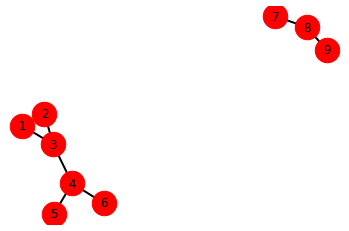

MGD =   1.78


In [3]:
G = nx.Graph([(1,3),(1,2),(2,3),(3,4),(4,5),(4,6),(7,8),(8,9)])
nx.draw_networkx(G,arrows=False,with_labels=True,node_size=600,node_color='r',width=2) # draw it pretty
limits=plt.axis('off')                                                                # turn off axes
plt.show()                                                                            # show me the network!

#### NOTE: The next several lines are just code I wrote to test the outputs of the networkx function and check my results
# shortest_paths = nx.all_pairs_shortest_path_length(G)

# tot = 0
# for elt in shortest_paths:
#    print(elt[1])
#    print(sum(elt[1].values()))
#    tot += sum(elt[1].values())
# print(tot)

ellm = compute_MGD(G)
print(f'MGD =  %5.2f' % ellm)

### Problem 1-B (10 pts)

Given a way to measure the $\langle \ell \rangle$ for *one* network, we can jump right to a numerical experiment by choosing $p$ and then generating *one* network from $G(n,p)$ for a variety of choices of $n$, and for each, calculate $\langle \ell \rangle$. We'll visualize the result using a `semilogx` plot. (These results won't be *good*, and so we'll refine them in the next subproblem.)

* Set the target mean degree $c=2$, and use the `fast_gnp_random_graph()` function in `networkx` to generate a $G(n,p)$ network.
* To convincingly show the growth behavior, systematically vary $n$ over a wide range, e.g., choose $n=2^k$ for $k=\{4,5,6,7,8,9,10\}$.
* For each such choice of $n$, generate *one* $G(n,p)$ network, and compute its $\langle \ell \rangle$ using your `compute_MGD()` function.
* Then, produce a single `semilogx` plot that shows how $\langle \ell \rangle$ varies as a function of $n$. (Using a `semilogx` will conveniently make logarithmic functions look linear on the page.)
* Run this experiment a few times, and then comment briefly in the markdown box below what you observe about the stability and smoothness of the trend.

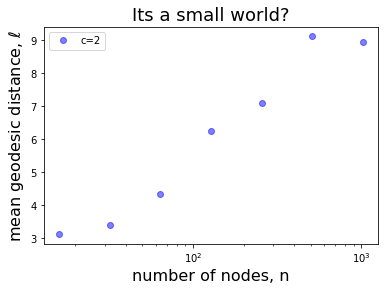

In [50]:
ns = np.logspace(4,10,num=7,base=2)  # number of nodes: 2^{4:10}
ns = ns.astype(int)                  # convert to ints
ellm = []                            # store the MGDs here

##### do not modify above here #####
c = 2 # target mean degree

for i in range(4, 11):
    n = 2**i
    p = c / (n - 1)
    G = nx.fast_gnp_random_graph(n, p)
    ellm.append(compute_MGD(G))

##### do not modify below here #####
plt.semilogx(ns, ellm, 'bo', alpha=0.5,label='c=2')
plt.title('Its a small world?', fontsize = 18)
plt.ylabel(r'mean geodesic distance, $\ell$', fontsize = 16)
plt.xlabel('number of nodes, n', fontsize = 16)
plt.legend(loc='upper left');
plt.show()

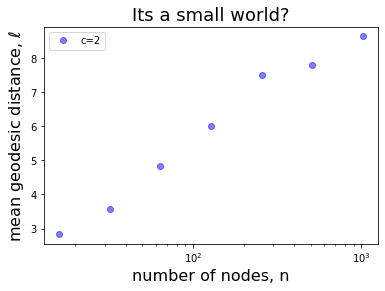

In [51]:
ns = np.logspace(4,10,num=7,base=2)  # number of nodes: 2^{4:10}
ns = ns.astype(int)                  # convert to ints
ellm = []                            # store the MGDs here

##### do not modify above here #####
c = 2 # target mean degree

for i in range(4, 11):
    n = 2**i
    p = c / (n - 1)
    G = nx.fast_gnp_random_graph(n, p)
    ellm.append(compute_MGD(G))

##### do not modify below here #####
plt.semilogx(ns, ellm, 'bo', alpha=0.5,label='c=2')
plt.title('Its a small world?', fontsize = 18)
plt.ylabel(r'mean geodesic distance, $\ell$', fontsize = 16)
plt.xlabel('number of nodes, n', fontsize = 16)
plt.legend(loc='upper left');
plt.show()

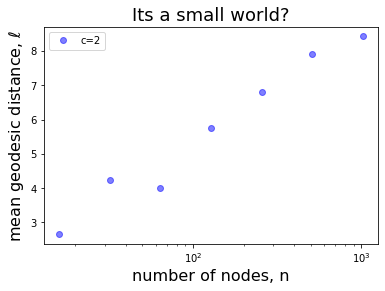

In [52]:
ns = np.logspace(4,10,num=7,base=2)  # number of nodes: 2^{4:10}
ns = ns.astype(int)                  # convert to ints
ellm = []                            # store the MGDs here

##### do not modify above here #####
c = 2 # target mean degree

for i in range(4, 11):
    n = 2**i
    p = c / (n - 1)
    G = nx.fast_gnp_random_graph(n, p)
    ellm.append(compute_MGD(G))

##### do not modify below here #####
plt.semilogx(ns, ellm, 'bo', alpha=0.5,label='c=2')
plt.title('Its a small world?', fontsize = 18)
plt.ylabel(r'mean geodesic distance, $\ell$', fontsize = 16)
plt.xlabel('number of nodes, n', fontsize = 16)
plt.legend(loc='upper left');
plt.show()

While the trend seems relatively linear, each time I run this plot, it changes slightly. This indicates that the randomness of this graph production is reflected in the plotting of the MGD. In general, we can see that as n increases, so does the mean geodesic distance (which makes sense. More nodes implies that more edges will need to be traversed to get to the "furthest away" nodes). I have run the code 3 times above to demonstrate the lack of stability of this simulation.

### Problem 1-C (10 pts)

Because $G(n,p)$ is a random graph, each $\langle \ell \rangle$ is a *random variable*, meaning that it will fluctuate between different draws from the parameterized model $G(n,p)$. In other words, if we draw a sequence of graphs $G_1,G_2,\dots$ from the model $G(n,p)$, we'll get a sequence of measurements $\langle \ell \rangle_1,\langle \ell \rangle_2,\dots$, each a little different from each other.

To get a *smooth* trend in our plot, we need to get a *good* estimate of $\langle \ell \rangle$ for each choice of $n$. We do this by *averaging* the sequence of measurements $\langle \ell \rangle_1,\langle \ell \rangle_2,\dots$ for each choice of $n$. Averaging generates a better estimate of the mean because it estimates the central value around which the fluctuations occur. Plotting these central tendencies will produce a nicely smooth curve in the final figure for showing the growth of $\langle \ell \rangle(n)$. (This idea is _general_, meaning you can apply it to almost any model that produces a fluctuating signal, because of something called the Central Limit Theorem.)

* Write a function `compute_MGD_Gnp(n,p,rep)` that takes as input the parameters of $G(n,p)$ and a number of *repetions* `rep`, and returns the average MGD over `rep` draws from $G(n,p)$. (This should be a wrapper around your function `compute_MGD()`.)
* Apply your function with `n=256`, `c=2`, and `rep=10`, and report the results.

In [5]:
def compute_MGD_Gnp(n,p,rep):
    # input : a number of nodes 'n', edge density parameter 'p', and number of repetitions 'rep'
    # output: the mean geodesic path length of G(n,p), averaged over 'rep' instances
    
    ells = []
    for _ in range(rep):
        G = nx.fast_gnp_random_graph(n, p)
        ells.append(compute_MGD(G))
    
    return sum(ells)/rep

In [6]:
n = 256
c = 2
p = c /(n - 1)
rep = 10

ellmean = compute_MGD_Gnp(n,p,rep)

##### do not modify below here #####
print(f'[ n={n} | c={c} | reps={rep} ] <ell> = %5.2f' % ellmean)

[ n=256 | c=2 | reps=10 ] <ell> =  7.20


### Problem 1-D (20 pts) Putting it all together

* Rewrite your numerical experiment so that it uses `compute_MGD_Gnp()` to compute a *good* estimate of $\langle \ell \rangle$, for each choice of $n$ and $c$.
* Expand your experiment to compute how $\langle \ell \rangle$ grows as a function of $n$, for each of three mean degree values $c=\{2,4,8\}$.
* Use $n=2^k$ for $k=\{4,5,6,7,8,9,10,11,12,13\}$. (This will take a while on your computer; plan accordingly)
* Then, on one figure, plot
  * the three data series from your simulations, and 
  * three *trend lines,* each of the form $b\times \log_{10} n + a$, one for each of the three data series. For each such trend line, choose a value $b$ that puts it visually very close to its data series. You may position these by hand, or by estimation using something like `np.polyfit`.
* Finally, briefly discuss what you see about how $b$ varies with $c$, and give some intuition as to why this behavior makes sense given what we know about the structure of ER graphs.

Hint 1: Separate the code for the experiment from the code for the visualization, so that you can tinker with the latter without having to re-run the former.

Hint 2: Running the full experiment to completion will take a while on your computer (it took 4 hours on mine), so prototype the code and visualization using only a few, smaller values of $n$. Once you have the bugs worked out, then do the full range of $n$ while you sleep/get coffee/go for a hike/etc.


(*5 pts extra credit*) Construct a second plot of $b$ vs. $c$ and describe the functional relationship between the two. To get a good view of it, you may need to consider additional values of $c$.

In [7]:
# YOUR CODE HERE (run the experiment)
def my_experiment(n_vals, c_vals, rep = 5):
    data = {c: [] for c in c_vals}
    for c in c_vals:
        for n in n_vals:
            p = c / (n - 1)
            data[c].append(compute_MGD_Gnp(n,p,rep))
    return data

In [8]:
n_vals = [2**k for k in range(4, 14)]
c_vals = [2, 4, 8]
graph_data = my_experiment(n_vals, c_vals)
print(graph_data)

{2: [2.741287834972046, 3.8627302022683465, 4.3887678751824035, 6.1484449053515196, 6.4218529550505865, 8.100140459378983, 9.04889541817324, 10.104499319874122, 11.353580495059052, 11.882250631702256], 4: [2.0364468864468863, 2.5361559139784946, 3.1667178699436764, 3.7086756132272756, 4.151465230249338, 4.612944136760473, 5.113023609240169, 5.599935187274353, 6.078182517168209, 6.628746449301955], 8: [1.49, 1.8004032258064515, 2.207242063492063, 2.5654773622047244, 2.8577049559981473, 3.2409027977629408, 3.5665507262452345, 3.887707385964446, 4.233057370497983, 4.566499297903109]}


NOTE: I used the internet (stack overflow) to find information about using np.polyfit on semilogx plots in order to implement this correctly.

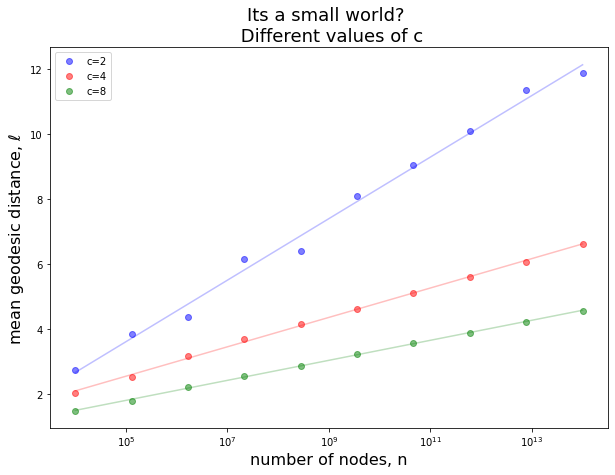

In [66]:
# YOUR CODE HERE (plotting the results)
ns = np.logspace(4,14,num=10,base=10)
plt.figure(figsize=(10, 7))
plt.semilogx(ns, graph_data[2], 'bo', alpha=0.5,label='c=2')
p2 = np.polyfit(np.log(ns), graph_data[2], 1)
plt.semilogx(ns, p2[0] * np.log(ns) + p2[1], 'b-', alpha=0.25)

plt.semilogx(ns, graph_data[4], 'ro', alpha=0.5,label='c=4')
p4 = np.polyfit(np.log(ns), graph_data[4], 1)
plt.semilogx(ns, p4[0] * np.log(ns) + p4[1], 'r-', alpha=0.25)

plt.semilogx(ns, graph_data[8], 'go', alpha=0.5,label='c=8')
p8 = np.polyfit(np.log(ns), graph_data[8], 1)
plt.semilogx(ns, p8[0] * np.log(ns) + p8[1], 'g-', alpha=0.25)

plt.title('Its a small world? \n Different values of c', fontsize = 18)
plt.ylabel(r'mean geodesic distance, $\ell$', fontsize = 16)
plt.xlabel('number of nodes, n', fontsize = 16)
plt.legend(loc='upper left');
plt.show()

As c increases, b decreases. This makes sense because it indicates a smaller slope for the line (i.e. as n increases, mdg increases linearly still but *slower* for larger values of c). This completely makes sense based on the structure of ER graphs. We know that the probability of edge creation in an Erdos-Renyi random graph is governed by the value of c and the number of nodes, where this probability is directly proportional to c and inversely proportional to n. But this means that as c gets larger, so does the probability that an edge will be created between any two randomly selected nodes. This means that more edges will be created, which means there will be more paths between any two pairs of nodes and consequently the longest path between them will be shorter, ultimately lowering the observed MGD. 

### **EXTRA CREDIT:** Investigation of b vs c.

In [64]:
c_vals = [2**i for i in range(1, 10)]
n_vals = [2**k for k in range(4, 9)]
results = my_experiment(n_vals, c_vals, rep = 5)

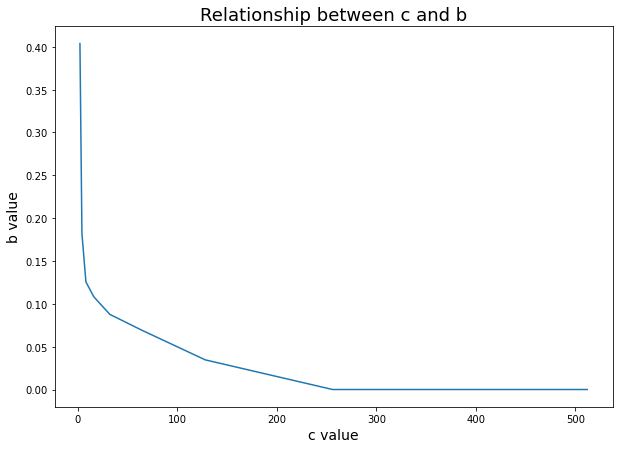

In [70]:
n = np.logspace(4,9,num=5,base=10)
b_vals = []

for c in c_vals:
    p = np.polyfit(np.log(n), results[c], 1)
    b_vals.append(p[0])
    
plt.figure(figsize=(10, 7))
plt.plot(c_vals, b_vals)
plt.title("Relationship between c and b", fontsize= 18)
plt.xlabel("c value", fontsize=14)
plt.ylabel("b value", fontsize=14)
plt.show()

This version of the experiment (with more values of c and fewer values of n) indicates that b decreases exponentially as c increases. This makes sense because we are plotting our results above on a semilog plot (so a linear relationship between degree and c is seen on a semilog x plot => an exponential relationship would be seen on normal axes. 

***
***
## Problem 2 : Does this random graph make my $\langle \ell \rangle$ look big? (40 pts)

In this question, you will use the ER and Chung-Lu random graph models as null models to investigate the degree to which edge density and/or degree distributions can *explain* observed patterns in a biological network.

* Go to the [Index of Complex Networks](https://icon.colorado.edu/) (ICON) website, find the **P. pacificus nematode (2013)** entry, and download the `P.pacificus_neural.synaptic_1` network data file from the linked website. This file is in a `graphML` format, which is different from `GML`, but functionally is similar. `networkx` can read both.

### Problem 2-A (10 pts)

To warm up, load the *P. pacificus* network and treat it as a simple graph (edges unweighted and undirected; no multi-edges; no self-loops). Then calculate and report
* number of nodes $n$
* (undirected) edges $m$
* mean degree $\langle k \rangle$
* clustering coefficient $C$
* mean geodesic distance $\langle \ell \rangle$
* a `loglog` plot showing the degree distribution's CCDF $\Pr(K\geq k)$ (use `plot_CCDF()` from PS1)

In [77]:
## I copied and pasted this code from problem set 1

def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)
    plt.figure(figsize = (10, 7))

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.title("Complementary Cumulative Distribution Function\n Graph Node Degrees", fontsize=18)
    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('Pr(K>=k)', fontsize=14)
    plt.show()
    return

In [88]:
# this data set is from :
# D.J. Bumbarger et al., "System-wide Rewiring Underlies Behavioral Differences in 
#                         Predatory and Bacterial-Feeding Nematodes." Cell 152, 109-119 (2013)
fname = 'p.pacificus_neural.synaptic_1.graphml'
print(f'reading the network file : {fname}\n')

Gmulti = nx.read_graphml('./' + fname)  # Gmulti is a directed multigraph
G = nx.Graph()                          # G will be a simple graph
G.add_edges_from(Gmulti.edges())  # G is now a simplified Gmulti (tricky :)


##### do not modify above here #####

n = G.number_of_nodes()
m = G.number_of_edges()
# print(nx.is_directed(G))

# G is not directed, so we can use the formula!

kmean = (2*m) /n
ellmean = compute_MGD(G)
C = nx.average_clustering(G)

##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree   , <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

reading the network file : p.pacificus_neural.synaptic_1.graphml

number of nodes, n  = 54
number of edges, m  = 141
mean degree   , <k> =  5.22
clustering coefficient, C     =  0.28
mean geodesic distance, <ell> =  2.57


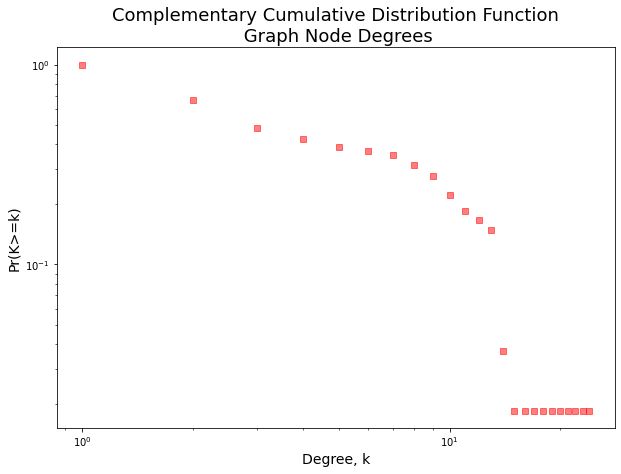

In [89]:
degree_sequence = [deg for node, deg in list(G.degree())]
plot_CCDF(degree_sequence)

### Problem 2-B (15 pts)

Use the `Erdos-Renyi random graph model` to assess whether the values of $C$ and $\langle \ell \rangle$ are large, small, typical, or usual, given the *P. pacificus* edge density. Specifically,
* calculate and report the edge density _p_ for the *P. pacificus* network
* using an appropriately parameterized ER model, tabulate
  * the ER null distribution for $\Pr(C)$ and the empirical value of $C$
  * the ER null distribution for $\Pr(\langle \ell \rangle)$ and the empirical value of $\langle \ell \rangle$
* for each, use the given `plot_nullAndEmpirical()` function to compare the null and empirical values
* briefly discuss how well edge density explains or fails to explain the empirical values

Hint: to get a good null distribution, 200 networks should be sufficient.

In [80]:
def plot_nullAndEmpirical(nulls,emp,qlabel,nlabel,elabel,xlim,ylim):
    # input: nulls, a list of values representing a null (reference) distribution
    #        emp, the empirical value to be compared to the null
    #        qlabel [string], the name of the empirical quantity, e.g., '<ell>' or 'C'
    #        nlabel [string], the name of the null data series
    #        elabel [string], the name of the empirical data source
    #        xlim [scalar], the upper limit of the x-axis
    #        ylim [scalar], the upper limit of the y-axis

    counts, bins = np.histogram(nulls,bins=50,range=(0,xlim), density=True)
    nreps = len(nulls)

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(bins[:-1], counts/100, 'b-', alpha=0.5, label=nlabel)
    plt.plot([emp, emp], [0, ylim], 'r-', alpha=0.5, label=elabel)
    plt.xlabel(qlabel)
    plt.ylabel('Pr('+qlabel+')')
    plt.xlim(0, xlim)
    plt.legend(loc='upper right');
    plt.show()
    
    return

The edge density of this graph is: p = 0.09853249475890985


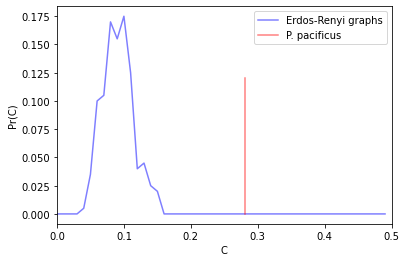

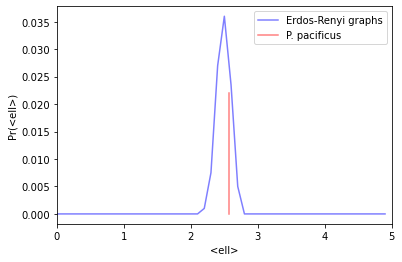

In [83]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####

p = kmean/(n - 1) 
print(f'The edge density of this graph is: p = {p}')

for _ in range(200):
    random_graph = nx.erdos_renyi_graph(n, p)
    Cs.append(nx.average_clustering(random_graph))
    ells.append(compute_MGD(random_graph))

##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Erdos-Renyi graphs','P. pacificus',0.5,0.12)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Erdos-Renyi graphs','P. pacificus',5,0.022)

It appears that edge density does not explain the clustering coefficient of this graph (in general, one would expect based on this statistic alone that the clustering coefficient would be much lower). This is indicated on the plots by the fact that the empirical value for this data is seen much further to the right on the graph of c vs Pr(c) than the peak of the null distribution probabilities. In contrast, the edge density seems to completely account for the mean geodesic distance as the peak of the null distribution model is almost identical to the empirical value.

### Problem 2-C (5 pts)

Before we use the `Chung-Lu random graph model` to assess whether the *P. pacificus* values of $C$ and $\langle \ell \rangle$ are large, small, typical, or unusual:
* Use the `expected_degree_graph()` function in `networkx` to take the degree sequence of the *P. pacificus* network and generate a single simple Chung-Lu graph $G$ with no self-loops.
* Then, create simple ridiculogram visualizations of this network and of the empirical *P. pacificus* network.
* For both, note the number of edges each graph contains.
* Comment briefly on what similarities or differences you observe between these two visualizations.

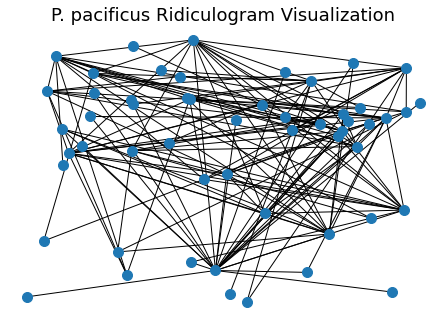

The average degree of the CL random graph is 5.444444444444445


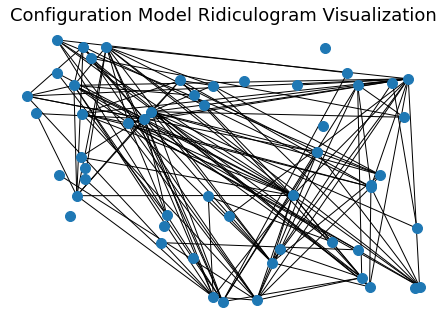

In [87]:
# YOUR CODE HERE

degree_sequence = [deg for node, deg in list(G.degree())]
#print(len(degree_sequence))
CL_random = nx.expected_degree_graph(degree_sequence)
r_n = nx.number_of_nodes(CL_random)
r_m = nx.number_of_edges(CL_random)
r_kmean = (2*r_m) /r_n

nx.draw_random(G, node_size = 100)
plt.title("P. pacificus Ridiculogram Visualization", fontsize = 18)
plt.show()

print(f'The average degree of the CL random graph is {r_kmean}')
nx.draw_random(CL_random, node_size = 100)
plt.title("Configuration Model Ridiculogram Visualization", fontsize = 18)
plt.show()

In general, the configuration model seems to mimic the actual network graph fairly well but one thing I notice every time I create a random graph is that the configuration model produces graphs that often *appear* to have a lower average degree than the actual network (they often have at least one singleton node, something that is not seen in the actual network) but in reality, the average degree (which I calculated and printed above the ridiculogram grpah of the Chung Lu model) is close to the average degree (within an acceptable error range). Because these visualizations are both random, it is difficult to make any significant observations from the plots, but I thought it was very interesting that I saw this trend in the way that the CL model produces degree sequences and the fact that the average degrees are actually similar. This indicates that while the minimum degree may be smaller in the configuration model than the actual network, the maximum node degree is likely larger.  

### Problem 2-D (10 pts)

Now, write a wrapper around your Chung-Lu graph generator that replicates the work of your answer to `Problem 2-B`, and thereby assess whether the values of $C$ and $\langle \ell \rangle$ are large, small, typical, or unusual, given the *P. pacificus* degree structure. Specifically,
* using an appropriately parameterized Chung-Lu model, tabulate and plot
  * the Chung-Lu null distribution for $\Pr(C)$ and the empirical value of $C$
  * the Chung-Lu null distribution for $\Pr(\langle \ell \rangle)$ and the empirical value of $\langle \ell \rangle$
* briefly discuss how well the degree structure explains or fails to explain the empirical values, and how accounting for degree structure changes the null distributions

Hint: to get a good null distribution, 200 networks should be sufficient.

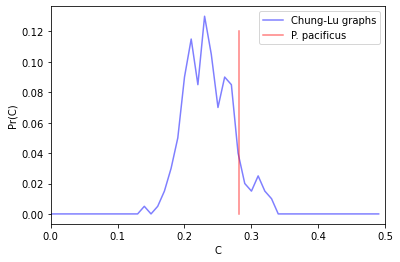

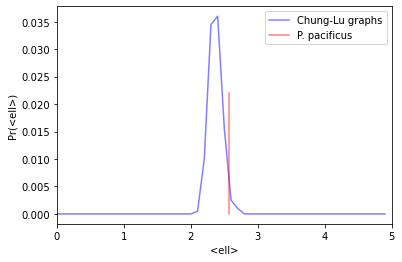

In [49]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####

for _ in range(200):
    random_graph = nx.expected_degree_graph(degree_sequence)
    Cs.append(nx.average_clustering(random_graph))
    ells.append(compute_MGD(random_graph))


##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Chung-Lu graphs','P. pacificus',0.5,0.12)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Chung-Lu graphs','P. pacificus',5,0.022)

The degree structure seems to at least partially explain both the empirical clustering coefficient and the empirical mean geodesic distance seen. As opposed to the similar graphs of the ER model, we see in this case that the empirical values, while a little higher than the main predictions of the configuration model, are closer to the mean value estimated by this model, whereas the ER graph showed the empirical value of c several standard deviations from the mean estimated value for c based on the null distribution.

***
***

## Problem 3 : Reading the literature (*10 pts extra credit*)

*This extra credit problem is meant to help you look for a project topic*

Choose a paper from the [Supplemental Reading list on the external course webpage](https://aaronclauset.github.io/courses/3352/). Read the paper (the whole paper, not just the abstract). Think about what it says. Then, write 1-3 sentences for each of the following questions in a way that clearly summarizes the work, and its context.
* What was the research question?
* What was the approach the authors took to answer that question?
* What did they do well?
* What could they have done better?
* What extensions can you envision?


Do not copy any text from the paper itself; write your own summary, in your own words in Markdown in the corresponding box below. Be sure to answer each of the five questions. The amount of extra credit will depend on the accuracy and thoughtfulness of your answers.

* *What paper did you choose?*<br/>

I chose the paper: **The Link Prediction Problem for Social Networks** by David Liben-Nowell and Jon Kleinberg published in the Journal of the Association for Informaton Science and Technology in January 2004.

<br/>


* *What was the research question?*<br/>

The authors wanted to investigate the likelihood that nodes in social networks that are not connected would develop these connections at a later timestep. The question they wanted to investigate was: "are there ways to predict direct interactions in a social network before they happen based on the current links in the network?"

<br/>

* *What was the approach the authors took to answer that question?*<br/>

The authors of this paper conducted an experiment that investigated the effectiveness of several link-prediction methods on 5 different datasets about author collaboration on scientific papers. For each of the datasets, they considered two different timesteps, and implemented each link prediction method on the earlier timestep to gauge its effectiveness in predicting edges that would emerge in the next timestep. The link prediction methods based on node neighborhoods are all ones that we have discussed in class, but the authors also proposed some alternative link prediction methods based on analyzing existing paths between nodes. 

<br/>

* *What did they do well?*<br/>

The authors did a great job explaining the importance of this analysis to social networks and illustrating the methods of link prediction that they tested on the data. The theory part of this paper is incredibly well-developed and interesting.

<br/>

* *What could they have done better?*<br/>

From my perspective, the visualization of the results is useful but is misplaced in the paper. The graphs provided do show useful data, but more direct discussions of the implication of each of the visuals after they are presented would be useful. Because each visual takes up a whole page, a lot of scrolling is needed to look at the visual and read the authors' discussion of the graph. More detail would have been useful on the results/analysis side of the paper. 

<br/>

* *What extensions can you envision?*<br/>

I can envision a lot of future extensions of these results. The ability to predict links that will take place at later timesteps could be very useful for disease transmission analysis (based on who has a disease right now, are there ways we can model the transmission over time, possibly preventing or slowing the spread of the disease?) This paper also provides a number of alternative methods for link prediction which can be very useful when analyzing a specific network situation to determine which approach is most appropriate based on the qualities of the network in question. 